<a href="https://colab.research.google.com/github/satyajitghana/PadhAI-Course/blob/master/05_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [0]:
def sigmoid(x, w, b):
    return 1/(1+np.exp(-(w*x+b)))

In [0]:
sigmoid(1, 0.5, 0)

0.6224593312018546

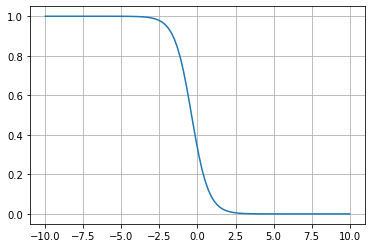

In [0]:
w = -1.8 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.7 #@param {type: "slider", min: -2, max: 2, step: 0.1}
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x, w, b))
plt.grid()
plt.show()

# Sigmoid for two variables

In [0]:
sigmoid_2d = lambda x1, x2, w1, w2, b : 1/(1 + np.exp(-(w1*x1+w2*x2+b)))

In [0]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [0]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 80)

X1, X2 = np.meshgrid(x1, x2)

X1.shape, X2.shape

((80, 100), (80, 100))

In [0]:
w1 = 0.5; w2 = 0.5; b = 0
Y = sigmoid_2d(X1, X2, w1, w2, b)

In [0]:
import matplotlib.colors

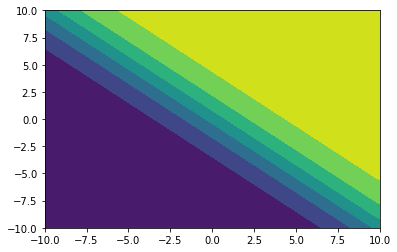

In [0]:
plt.contourf(X1, X2, Y)
plt.show()

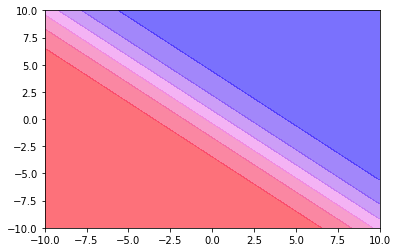

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "violet", "blue"])
plt.contourf(X1, X2, Y, cmap=my_cmap, alpha=0.6)
plt.show()

In [0]:
Y.shape

(80, 100)

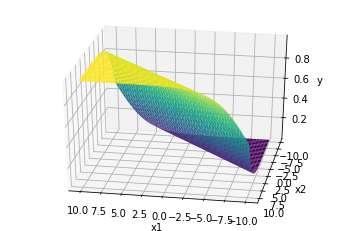

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 100)
plt.show()

# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 # generate random nos from -10 to 10
Y = sigmoid(X, w_unknown, b_unknown)

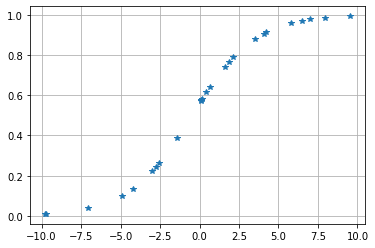

In [0]:
plt.plot(X, Y, '*')
plt.grid()
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [0]:
W = np.linspace(0, 2, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B) # go through every possible values of W and B

Loss = np.zeros(WW.shape)

In [0]:
WW.shape, BB.shape, Loss.shape

((100, 100), (100, 100), (100, 100))

In [0]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

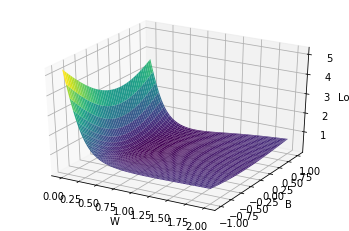

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

# ax.view_init(30, 100)
plt.show()

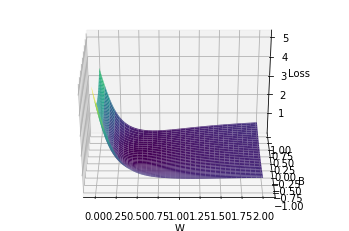

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B) # go through every possible values of W and B

Loss = np.zeros(WW.shape)

# compute Loss
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 270)
plt.show()

In [0]:
ij = np.argmin(Loss) # returns index of the min value index of the flattened array

In [0]:
i = np.floor(ij/Loss.shape[1])
j = ij - i * Loss.shape[1]
i, j = int(i), int(j)

In [0]:
WW[i, j], BB[i, j]

(0.5, 0.26)

# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    """
    computes x1*w1 + x2*w2 . . . + b
    """
    def perceptron(self, x):
        return np.dot(x.reshape(1, -1), self.w.T) + self.b
    
    """
    computes 1 / (1 + e^-x)
    """
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * 1.0

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):

        # initialize w, b

        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        # run for epoch number of times
        for i in range(epochs):
            dw = 0
            db = 0
            # calculate delta_w and delta_b 
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            

In [0]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    
    YY = np.zeros(XX1.shape)

    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=my_cmap)
    ax.plot()

# Fit for toy data

In [0]:
X = np.array([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = np.array([1, 1, 1, 0, 0, 0])
X.shape, Y.shape

((6, 2), (6,))

[[-0.00912136  1.78309067]] [[0.00025927]]
[[0.47629391 1.63017491]] [[0.0200737]]
[[1.12408761 1.40536222]] [[-0.01089424]]
[[1.1881758 1.3497546]] [[-0.01865281]]
[[1.23483294 1.29189719]] [[-0.01880276]]
[[1.27358902 1.22540424]] [[-0.01288251]]
[[1.30951989 1.14292401]] [[-0.00046834]]
[[1.34726769 1.03180619]] [[0.02073525]]
[[1.39405539 0.86490554]] [[0.05663919]]
[[1.46538691 0.57566187]] [[0.12187256]]
[[1.57000327 0.08906769]] [[0.22407871]]
[[ 1.53592031 -0.29103377]] [[0.18646476]]
[[ 1.46531325 -0.75980185]] [[0.07034313]]
[[ 1.69270453 -0.35439631]] [[-0.02465778]]
[[ 1.62667229 -0.7628936 ]] [[-0.12056534]]
[[ 1.79671768 -0.46206935]] [[-0.19402382]]
[[ 1.76647529 -0.69403523]] [[-0.25722687]]
[[ 1.84601043 -0.57722341]] [[-0.30153361]]
[[ 1.85688224 -0.63910493]] [[-0.34020302]]
[[ 1.88933552 -0.62924885]] [[-0.3733397]]


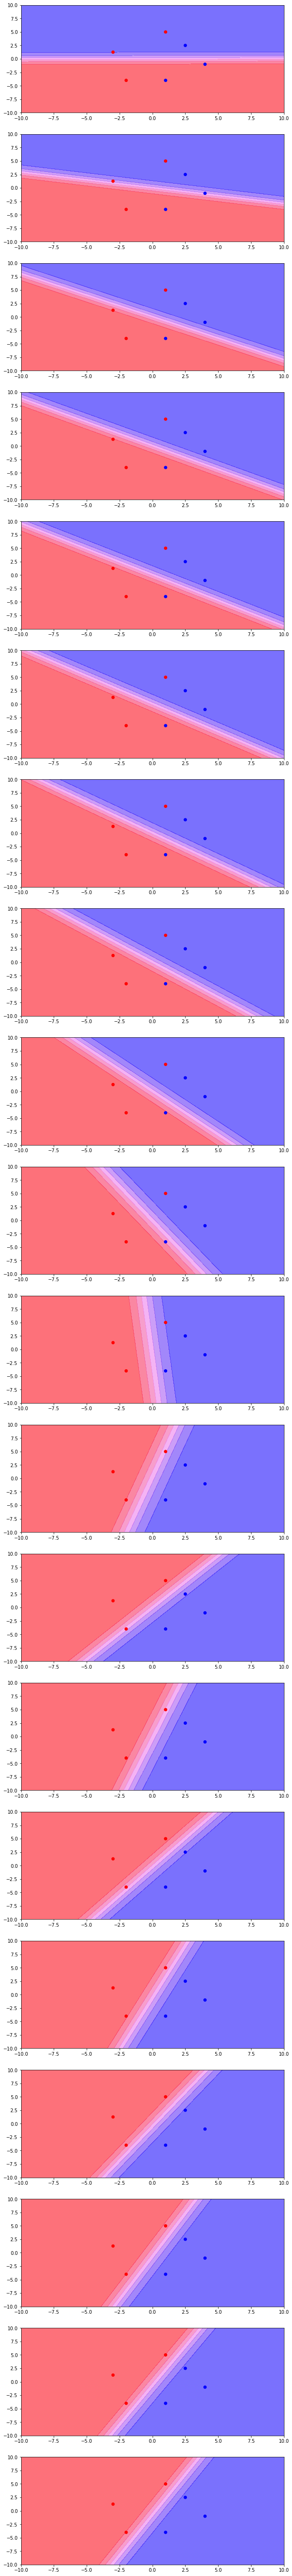

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.01, True)

N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)
plt.show()